# Stochastic Integral with functions

## Problem description

What we want to do is solving integral as follows, 
$$\int_0^t f\left(s\right)d\mathbf{\mathit{B_s}} = \lim_{\Delta t\rightarrow 0}\sum_{i=1}^{\infty} f\left(s_{i-1}\right) \left(\mathbf{\mathit{B_{s_{i}}}}-\mathbf{\mathit{B_{s_{i-1}}}}\right)$$
where $f\left(s\right)$ is a function in $L^22$ space, and $\mathbf{\mathit{B_s}}$ is a Wiener process.
Since Wiener process can be simulated by many normal distributions with mean $0$ and variance $\Delta t$, 
we can divide the interval $\left(0, s\right)$ into N parts, and simluate this integral as follows.
  

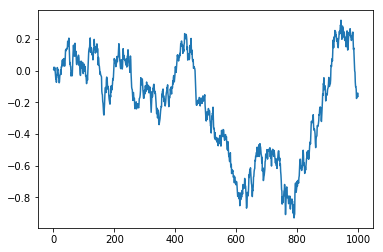

In [9]:
# First, let's plot some intutive figure on Wiener process

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tmax = 1
ndiv = 1000
dt = tmax/ndiv
sigma = np.sqrt(dt)
inc = np.random.randn(ndiv)*sigma
X = np.arange(1000) + 1
Y = np.add.accumulate(inc)
plt.plot(X, Y)
plt.show()

In [8]:
# For simplicity, we set max time = 1, division = 1000
tmax = 1
ndiv = 1000

def simulate_integral(func, tmin, tmax, ndiv = 1000):
    dt = (tmax - tmin)/ndiv
    sigma = np.sqrt(dt)
    inc = np.random.randn(ndiv)*sigma
    X = np.linspace(tmin, tmax, ndiv, endpoint=False)
    return sum(func(X) * inc)

print(simulate_integral(lambda x: x**2, 0, 1, 1000))

0.17313491583864798


Stochastic calculus tells us that if such integral exists, it shall converge to (MSE) a normal distribution with mean $0$ and variance $ \int_0^{t} f^2\left(s\right) ds$, so let's do a small experiment to confirm this result.

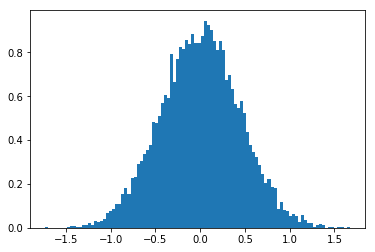

In [11]:
N = 10000

results = []
for _ in range(N):
    results.append(simulate_integral(lambda x: x**2, 0, 1, 1000))

plt.hist(results, bins=100, density=True)
plt.show()

Aha, it seems like a normal distribution! We can apply for MLE (maximum likelihood estimation) to calculate the mean of variance of this distribution. 
$$E\left(\mathbf{\mathit{X}}\right) = \frac{1}{N} \sum_i x_i$$
$$var\left(\mathbf{\mathit{X}}\right) = \frac{1}{N-1} \sum_i \left(x_i-E\left(\mathbf{\mathit{X}}\right)\right)^2  $$

In [12]:
results = np.array(results)
mu = np.mean(results)
var = (np.sum(results**2) - N*mu**2)/(N-1)
print(mu, var)

0.0017810345901140532 0.1975983787864781


According to our calculation, $\mu = 0.002$ and $\sigma^2 = 0.200$, and the analytic result is $\mu=0$, $\sigma^2 = 0.2$, seems the results are basically correct. We have achieved the goal!